# Advance Regression Assignment
## Predicting the actual value of the prospective properties

#### Problem Statement:

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

# The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# Read csv file using pandas
housing=pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Let's look at the number of rows and columns in the dataset
housing.shape

(1460, 81)

In [4]:
# Getting features
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Summary of the dataset: 730 rows, 16 columns, no null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Getting insights of the features
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# count the number of null values present in the data

round(housing.isnull().sum()/len(housing.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

## Certain columns have greater than 85% missing values so we will be removing them
- Alley
- PoolQC
- Miscfeature

In [8]:
housing.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
# count the number of null values present in the data

round(housing.isnull().sum()/len(housing.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 77, dtype: float64

In [10]:
# Dropping duplicate values in dataset, if exist
housing = housing.drop_duplicates()
print(f'\nShape of dataframe:\n{housing.shape}')
housing.head()


Shape of dataframe:
(1460, 77)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
# Removing identifier field
housing.drop(['Id'], axis=1, inplace=True)

In [12]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
housing.FireplaceQu = housing.FireplaceQu.fillna('NA')

In [14]:
#check missing values again
housing.isnull().sum()[housing.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [15]:
#check unique values of LotFrontage
housing.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

## Data Visualization

In [16]:
#extracting the continuous columns
data_numeric = housing.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

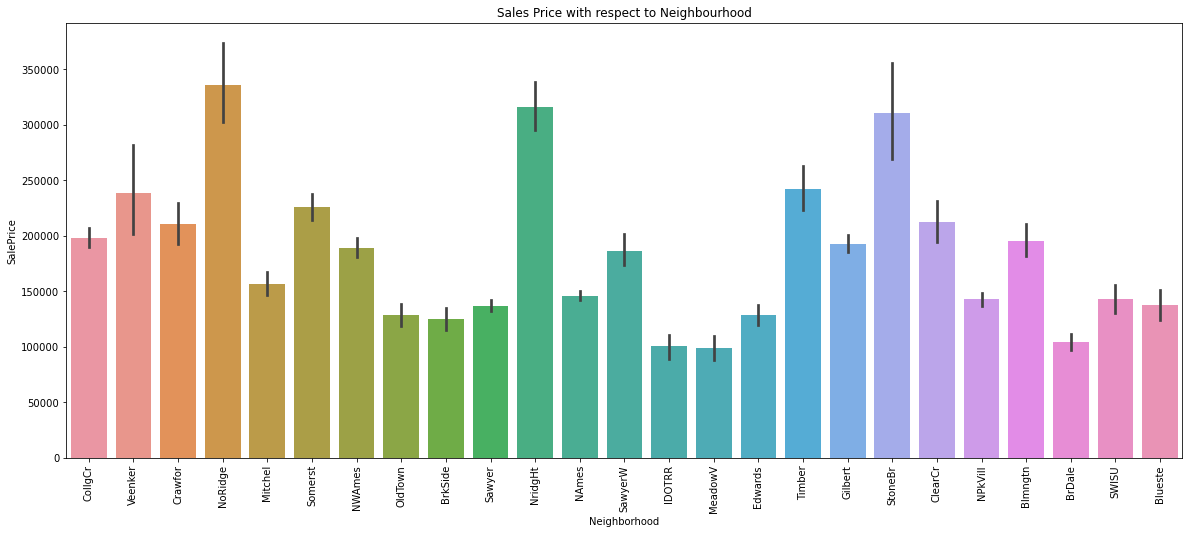

In [17]:
#Target variable 'sale Price' vs a few select columns
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housing)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

In [18]:
#Calculating correlation matrix
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


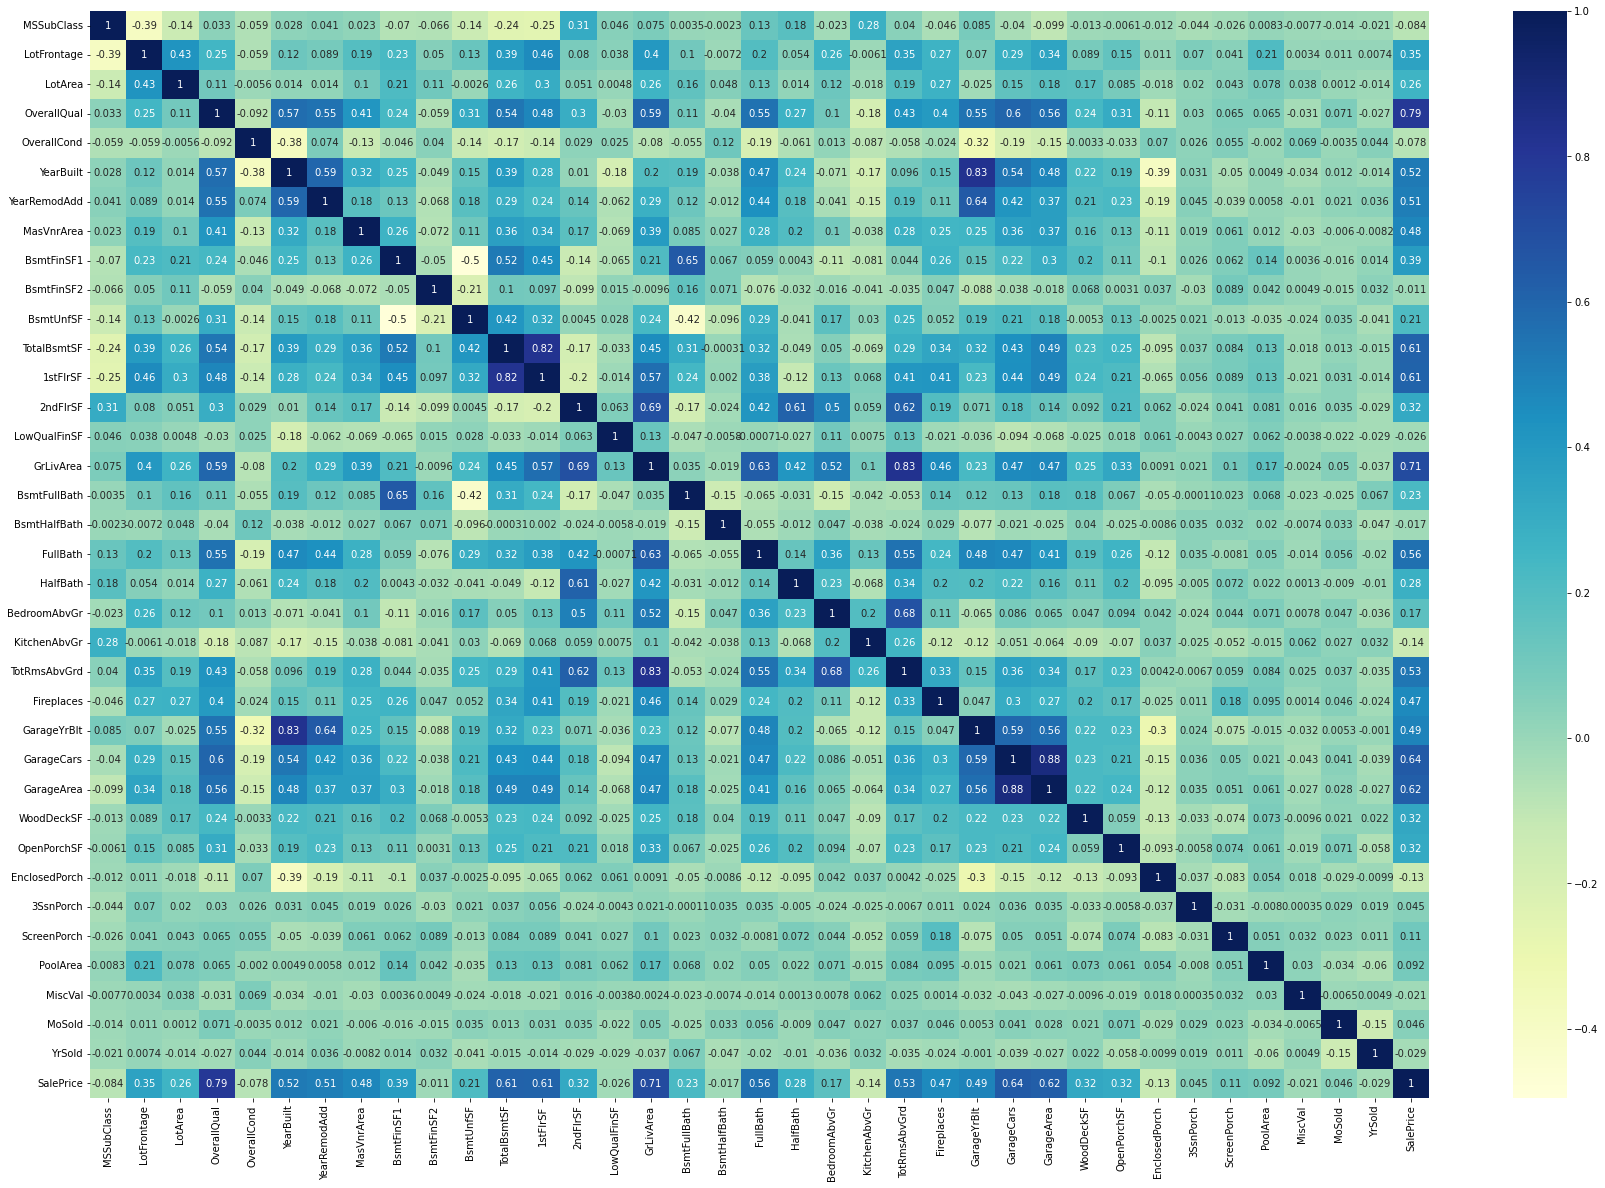

In [19]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

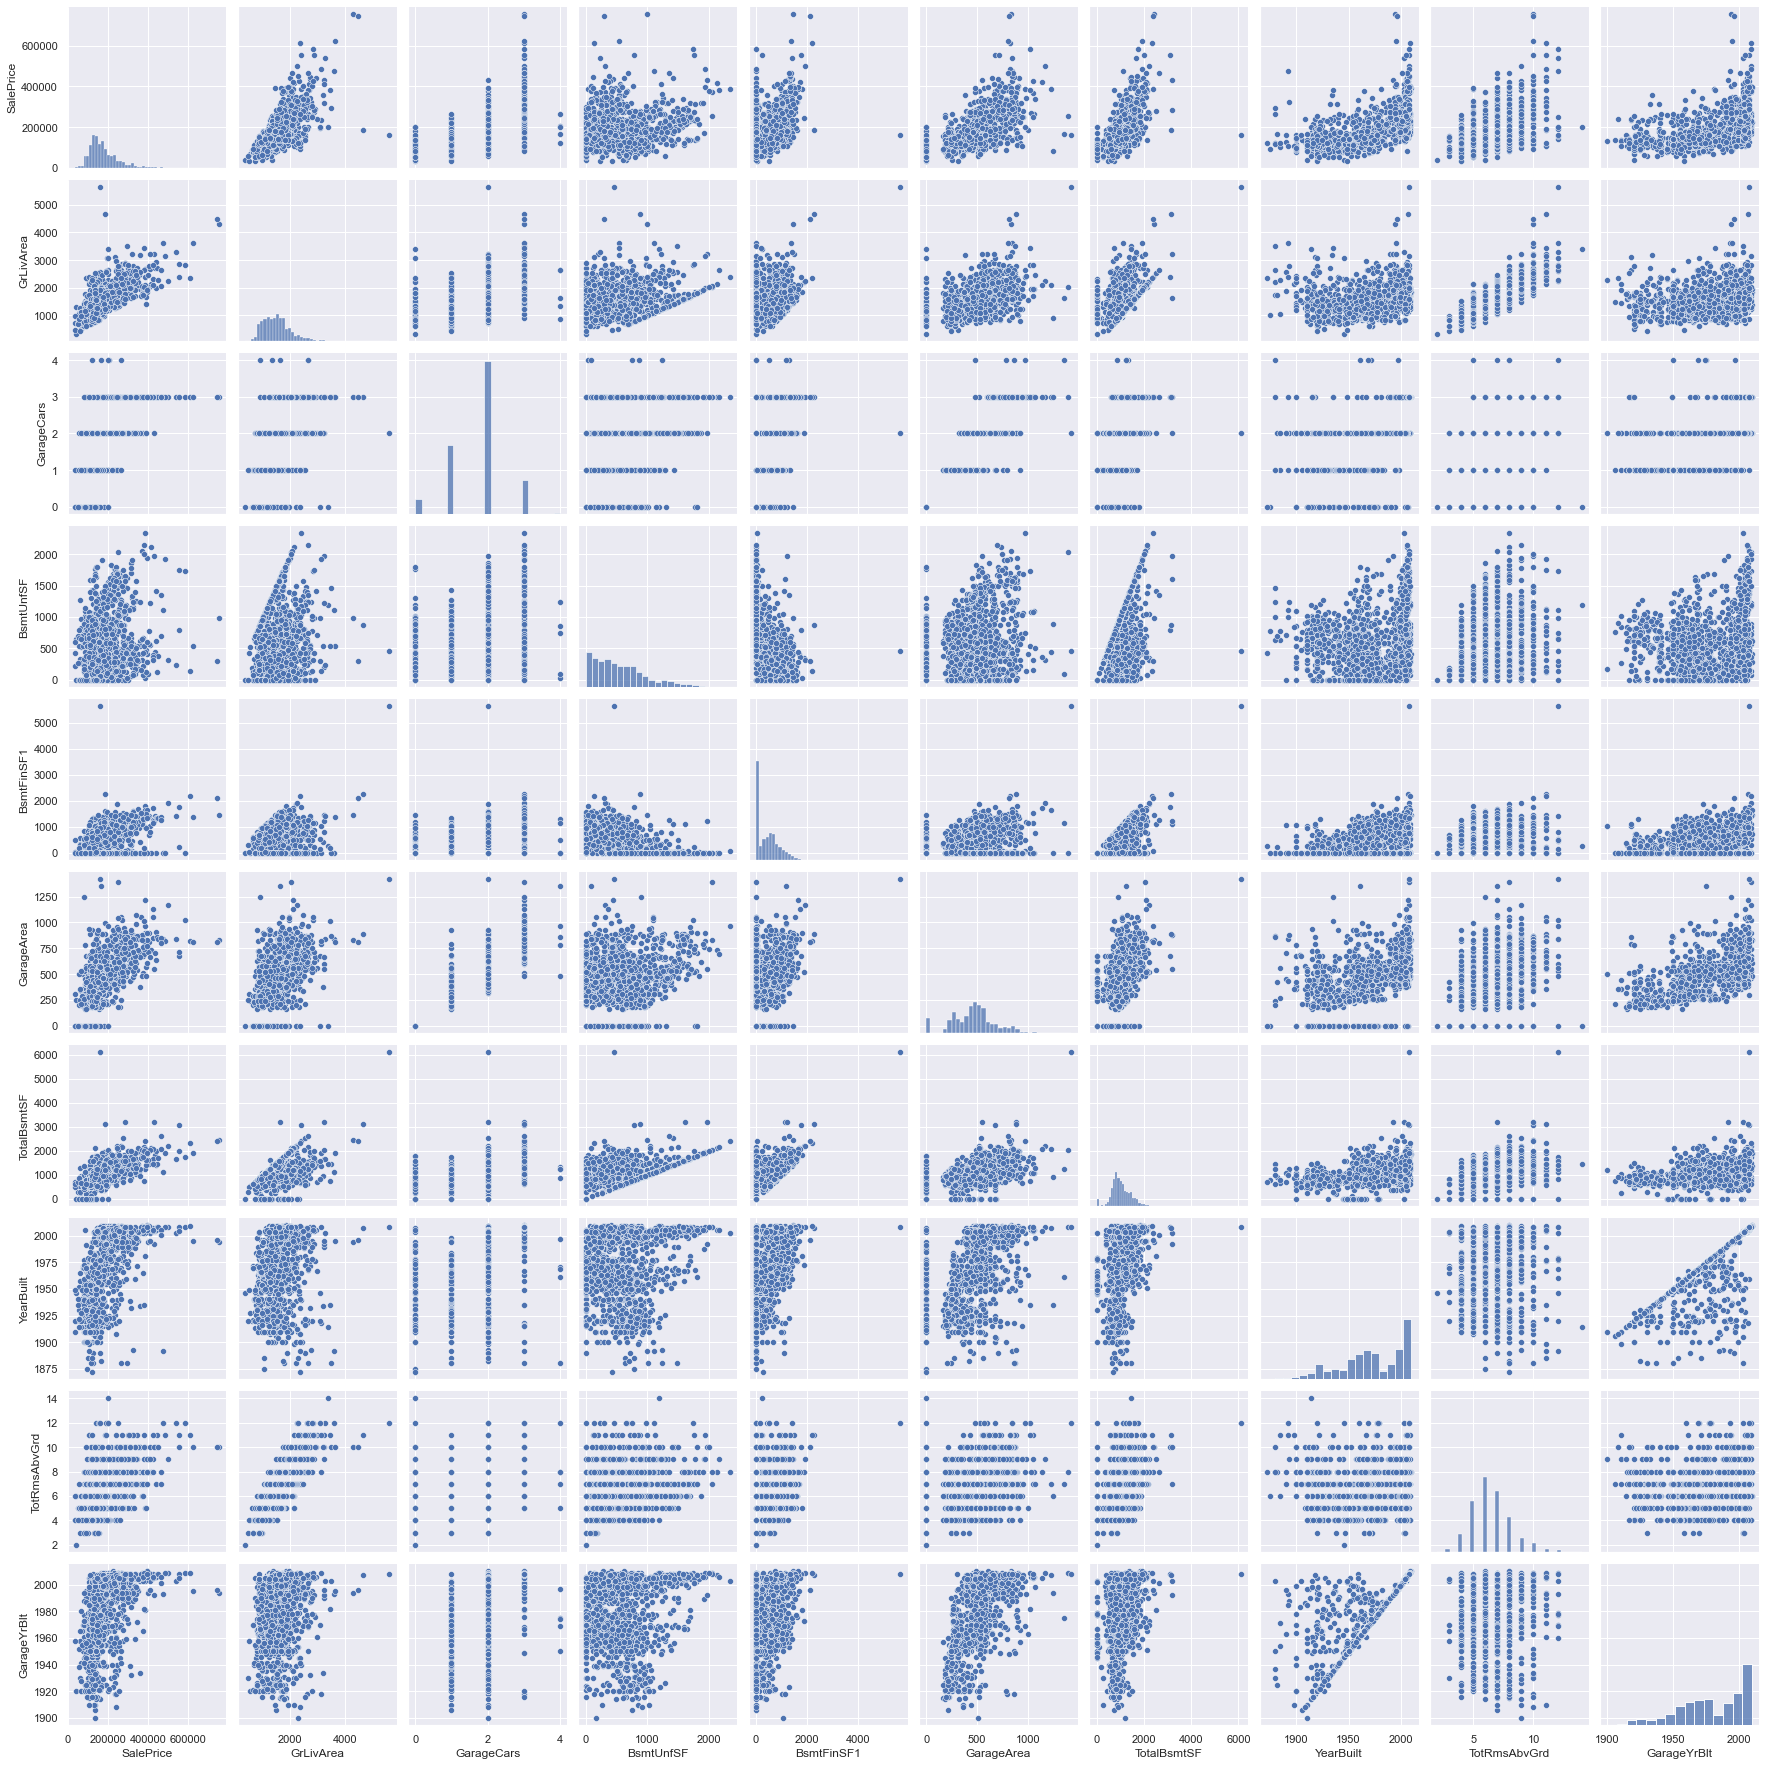

In [20]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housing[cols], size = 2.5)
plt.show()


## Data Preparation

In [21]:
#check median of LotFrontage
LotFrontage_median = housing.LotFrontage.median()
LotFrontage_median
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
housing.LotFrontage = housing.LotFrontage.fillna(LotFrontage_median)

In [22]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
housing.MasVnrArea = housing.MasVnrArea.fillna(housing.MasVnrArea.median())    
#replace Nan values of MasVnrArea with None i.e. No Masonary type
housing.MasVnrType = housing.MasVnrType.fillna('None')
#replace Nan values of BsmtQual with NA i.e. No Basement
housing.BsmtQual = housing.BsmtQual.fillna('NA')
#replace Nan values of BsmtCond with NA i.e. No Basement
housing.BsmtCond = housing.BsmtCond.fillna('NA')
#replace Nan values of BsmtExposure with No i.e. No Exposure
housing.BsmtExposure = housing.BsmtExposure.fillna('No')
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
housing.BsmtFinType1 = housing.BsmtFinType1.fillna('NA')
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
housing.BsmtFinType2 = housing.BsmtFinType2.fillna('NA')
#impute missing values of Electrical with mode due to categorical column
housing.Electrical = housing.Electrical.fillna(housing.Electrical.mode()[0])    
#replace Nan values of GarageType with NA i.e. No Garage
housing.GarageType = housing.GarageType.fillna('NA')
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
housing.GarageYrBlt = housing.GarageYrBlt.fillna(0)
#replace Nan values of GarageFinish with NA i.e. No Garage
housing.GarageFinish = housing.GarageFinish.fillna('NA')
#replace Nan values of GarageQual with NA i.e. No Garage
housing.GarageQual = housing.GarageQual.fillna('NA')
#replace Nan values of GarageFinish with NA i.e. No Garage
housing.GarageQual = housing.GarageQual.fillna('NA')
#replace Nan values of GarageCond with NA i.e. No Garage
housing.GarageCond = housing.GarageCond.fillna('NA')
#check missing values again
housing.isnull().sum()[housing.isnull().sum()>0]

Series([], dtype: int64)

In [23]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
housing['HouseAge'] = housing.YrSold - housing.YearBuilt

In [24]:
#Drop YrSold, YearBuilt after HouseAge
housing=housing.drop(columns=['YrSold', 'YearBuilt'])


In [25]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
housing = housing.astype(convert_dict)

In [26]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
housing = housing.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
housing = housing.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
housing = housing.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
housing = housing.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
housing = housing.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
housing = housing.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
housing = housing.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [28]:
#Drop columns which have moe than 80% bias data
housing=housing.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [29]:
housing.shape

(1460, 55)

## Create Dummy Varibales

In [30]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(housing['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
housing = pd.concat([housing,MSSubClass_df],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [31]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(housing['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [32]:
housing = pd.concat([housing,MSZoning_df],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,0,1,0


In [33]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(housing['LotShape'],drop_first=True, prefix='LotShape')
#concat LotShape_df with main house_data df
housing = pd.concat([housing,LotShape_df],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,1,0,0,0,0


In [34]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(housing['LotConfig'],drop_first=True, prefix='LotConfig')
#concat LotConfig_df with main house_data df
housing = pd.concat([housing,LotConfig_df],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,1,0,0,0,0,0,1,0,0


In [35]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(housing['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
housing = pd.concat([housing,Neighborhood_df],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [36]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(housing['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
housing = pd.concat([housing,HouseStyle_df],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [37]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(housing['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
housing = pd.concat([housing,RoofStyle_df],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,1,0,0,1,0,0,0,0


In [38]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(housing['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
housing = pd.concat([housing,Exterior1st_df],axis=1)
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(housing['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
housing = pd.concat([housing,Exterior2nd_df],axis=1)
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(housing['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
housing = pd.concat([housing,MasVnrType_df],axis=1)
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(housing['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
housing = pd.concat([housing,Foundation_df],axis=1)
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(housing['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
housing = pd.concat([housing,GarageType_df],axis=1)
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(housing['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
housing = pd.concat([housing,GarageFinish_df],axis=1)
#Drop categorical variables after ceating dummy varaibles
housing=housing.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,7,5,2003,196.0,4,4,1,6,...,0,1,0,0,0,0,0,0,1,0
1,80.0,9600,6,8,1976,0.0,3,4,4,5,...,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,2002,162.0,4,4,2,6,...,0,1,0,0,0,0,0,0,1,0
3,60.0,9550,7,5,1970,0.0,3,3,1,5,...,0,0,0,0,0,1,0,0,0,1
4,84.0,14260,8,5,2000,350.0,4,4,3,6,...,0,1,0,0,0,0,0,0,1,0


## Modeling Building


In [39]:
# Split the dataframe into train and test sets
df_train,df_test = train_test_split(housing,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


### Rescalling The Numeric Factors


In [40]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,...,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,...,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,1
1416,-0.433386,0.082504,-1.496155,0.384025,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,0,0,0,0,1,0,0,0,1
390,-0.886290,-0.202365,-0.781333,2.216221,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.280781,...,0,0,0,0,0,1,0,0,0,1


In [41]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-2.370506e-17,-9.108912e-17,-2.217184e-16,1.241797e-16,-8.375061e-16,-9.416779e-17,4.334328e-16,2.710858e-16,1.628907e-16,1.346186e-16,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.102509e+01,1.987332e+01,2.792775e+00,3.132319e+00,1.214656e+00,7.986733e+00,2.802485e+00,1.689151e+00,2.181065e+00,1.138412e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training The Model


In [42]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [43]:
X_train.columns


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=148)

### RFE- Recursive Feature Elimination
Take Top 35 Features from RFE

In [44]:
#Running RFE with the out variables equals to 35
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select =35)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 37),
 ('LotArea', False, 94),
 ('OverallQual', True, 1),
 ('OverallCond', False, 46),
 ('YearRemodAdd', False, 53),
 ('MasVnrArea', False, 61),
 ('ExterQual', False, 104),
 ('BsmtQual', False, 28),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 106),
 ('BsmtFinSF1', False, 9),
 ('BsmtFinSF2', False, 16),
 ('BsmtUnfSF', False, 14),
 ('TotalBsmtSF', False, 13),
 ('HeatingQC', False, 108),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 15),
 ('GrLivArea', False, 10),
 ('BsmtFullBath', False, 48),
 ('BsmtHalfBath', False, 113),
 ('FullBath', False, 74),
 ('HalfBath', False, 81),
 ('BedroomAbvGr', False, 76),
 ('KitchenAbvGr', False, 86),
 ('KitchenQual', False, 2),
 ('TotRmsAbvGrd', False, 69),
 ('Fireplaces', False, 41),
 ('FireplaceQu', False, 101),
 ('GarageYrBlt', False, 45),
 ('GarageCars', False, 38),
 ('GarageArea', False, 92),
 ('WoodDeckSF', False, 85),
 ('OpenPorchSF', False, 110),
 ('EnclosedPorch', False, 88),
 ('3SsnPorch

In [45]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_Veenker', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco',
       'Foundation_Stone', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [46]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     134.6
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:35:52   Log-Likelihood:                -12093.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     987   BIC:                         2.442e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.567e+05   1.34e+04     11.698      0.000     1.3e+05    1.83e+05
OverallQual            2.62e+04   1790.387     14.635      0.000    2.27e+04    2.97e+04
BsmtExposure          1.093e+04   1221.898      8.944      0.000    8530.632    1.33e+04
1stFlrSF              2.537e+04   1533.723     16.541      0.000    2.24e+04    2.84e+04
2ndFlrSF              1.973e+04   1409.105     14.003      0.000     1.7e+04    2.25e+04
MSSubClass_90        -2.191e+04   5875.853     -3.729      0.000   -3.34e+04   -1.04e+04
MSSubClass_120       -1.311e+04   4923.140     -2.662      0.008   -2.28e+04   -3444.565
MSSubClass_160       -2.999e+04   7305.113     -4.106      0.000   -4.43e+04   -1.57e+04
MSSubClass_190       -1.734e+04   7317.670     -2.369      0.018   -3.17e+04   -2975.700
MSZoning_FV           2.493e+04    1.7e+04      1.469      0.142   -8372.137    5.82e+04
MSZoning_RH           2.662e+04   1.62e+04      1.643      0.101   -5183.454    5.84e+04
MSZoning_RL           3.403e+04   1.32e+04      2.574      0.010    8085.144       6e+04
MSZoning_RM           1.934e+04   1.34e+04      1.439      0.150   -7028.077    4.57e+04
Neighborhood_BrDale   1.214e+04   1.24e+04      0.978      0.328   -1.22e+04    3.65e+04
Neighborhood_ClearCr  1.336e+04   8034.654      1.663      0.097   -2406.833    2.91e+04
Neighborhood_NoRidge  6.405e+04   6626.179      9.666      0.000     5.1e+04    7.71e+04
Neighborhood_NridgHt  5.875e+04   5267.077     11.153      0.000    4.84e+04    6.91e+04
Neighborhood_Somerst  3.827e+04   9263.572      4.131      0.000    2.01e+04    5.64e+04
Neighborhood_Veenker  2.753e+04   1.08e+04      2.550      0.011    6347.685    4.87e+04
Exterior1st_AsphShn  -1.708e+04   1.75e+04     -0.976      0.329   -5.14e+04    1.73e+04
Exterior1st_BrkComm   -6.19e+04   3.22e+04     -1.923      0.055   -1.25e+05    1270.932
Exterior1st_CBlock   -1.351e+04   1.73e+04     -0.783      0.434   -4.74e+04    2.03e+04
Exterior1st_CemntBd  -1.851e+04   2.45e+04     -0.755      0.451   -6.66e+04    2.96e+04
Exterior1st_ImStucc  -4.397e+04   3.73e+04     -1.178      0.239   -1.17e+05    2.93e+04
Exterior1st_Stone    -1.243e+04   2.47e+04     -0.504      0.614   -6.08e+04     3.6e+04
Exterior2nd_AsphShn  -1.708e+04   1.75e+04     -0.976      0.329   -5.14e+04    1.73e+04
Exterior2nd_Brk Cmn   2.535e+04   2.11e+04      1.201      0.230   -1.61e+04    6.68e+04
Exterior2nd_BrkFace    1.65e+04   8999.813      1.833      0.067   -1163.008    3.42e+04
Exterior2nd_CBlock   -1.351e+04   1.73e+04     -0.783      0.434   -4.74e+04    2.03e+04
Exterior2nd_CmentBd   3.155e+04   2.46e+04      1.283      0.200   -1.67e+04    7.98e+04
Exterior2nd_ImStucc   2.332e+04   1.32e+04      1.762      0.078   -2653.223    4.93e+04
Exterior2nd_Stucco   -1.982e+04   8061.430     -2.459    

In [47]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
28,Exterior2nd_CBlock,inf
25,Exterior2nd_AsphShn,inf
21,Exterior1st_CBlock,inf
19,Exterior1st_AsphShn,inf
0,const,155.77
11,MSZoning_RL,25.58
12,MSZoning_RM,20.09
29,Exterior2nd_CmentBd,18.35
22,Exterior1st_CemntBd,18.24
9,MSZoning_FV,10.54


In [48]:
#Exterior1st_Stone has higher p-value. Lets drop it.

X_train_new = X_train_rfe.drop(['Exterior1st_Stone'],axis=1)
#Rebuild the model without Exterior2ndCBlock

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:35:52   Log-Likelihood:                -12093.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     988   BIC:                         2.442e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.565e+05   1.34e+04     11.695      0.000     1.3e+05    1.83e+05
OverallQual           2.623e+04   1789.070     14.659      0.000    2.27e+04    2.97e+04
BsmtExposure          1.094e+04   1221.092      8.962      0.000    8546.836    1.33e+04
1stFlrSF              2.526e+04   1517.682     16.643      0.000    2.23e+04    2.82e+04
2ndFlrSF              1.973e+04   1408.572     14.008      0.000     1.7e+04    2.25e+04
MSSubClass_90        -2.181e+04   5870.550     -3.716      0.000   -3.33e+04   -1.03e+04
MSSubClass_120       -1.305e+04   4920.205     -2.653      0.008   -2.27e+04   -3398.456
MSSubClass_160        -3.01e+04   7299.080     -4.124      0.000   -4.44e+04   -1.58e+04
MSSubClass_190       -1.729e+04   7314.287     -2.364      0.018   -3.16e+04   -2934.365
MSZoning_FV           2.484e+04    1.7e+04      1.465      0.143   -8442.733    5.81e+04
MSZoning_RH           2.664e+04   1.62e+04      1.644      0.100   -5151.355    5.84e+04
MSZoning_RL           3.405e+04   1.32e+04      2.576      0.010    8114.865       6e+04
MSZoning_RM           1.933e+04   1.34e+04      1.439      0.150   -7030.851    4.57e+04
Neighborhood_BrDale   1.213e+04   1.24e+04      0.978      0.328   -1.22e+04    3.65e+04
Neighborhood_ClearCr  1.345e+04   8029.733      1.675      0.094   -2309.389    2.92e+04
Neighborhood_NoRidge  6.418e+04   6618.197      9.698      0.000    5.12e+04    7.72e+04
Neighborhood_NridgHt  5.885e+04   5260.628     11.188      0.000    4.85e+04    6.92e+04
Neighborhood_Somerst  3.838e+04   9257.361      4.146      0.000    2.02e+04    5.65e+04
Neighborhood_Veenker  2.758e+04   1.08e+04      2.556      0.011    6404.624    4.88e+04
Exterior1st_AsphShn  -1.701e+04   1.75e+04     -0.973      0.331   -5.13e+04    1.73e+04
Exterior1st_BrkComm   -6.19e+04   3.22e+04     -1.924      0.055   -1.25e+05    1247.228
Exterior1st_CBlock   -1.347e+04   1.72e+04     -0.781      0.435   -4.73e+04    2.04e+04
Exterior1st_CemntBd  -1.853e+04   2.45e+04     -0.756      0.450   -6.66e+04    2.96e+04
Exterior1st_ImStucc  -4.401e+04   3.73e+04     -1.180      0.238   -1.17e+05    2.92e+04
Exterior2nd_AsphShn  -1.701e+04   1.75e+04     -0.973      0.331   -5.13e+04    1.73e+04
Exterior2nd_Brk Cmn   2.541e+04   2.11e+04      1.204      0.229    -1.6e+04    6.68e+04
Exterior2nd_BrkFace   1.661e+04   8993.493      1.847      0.065   -1035.024    3.43e+04
Exterior2nd_CBlock   -1.347e+04   1.72e+04     -0.781      0.435   -4.73e+04    2.04e+04
Exterior2nd_CmentBd   3.167e+04   2.46e+04      1.289      0.198   -1.66e+04    7.99e+04
Exterior2nd_ImStucc   2.334e+04   1.32e+04      1.764      0.078   -2619.074    4.93e+04
Exterior2nd_Stucco   -1.975e+04   8057.039     -2.451      0.014   -3.56e+04   -3939.247
Foundation_Stone      1.198e+04   2.02e+04      0.594    

In [49]:
#Foundation_Stone has higher p-value. Lets drop it.

X_train_new = X_train_new.drop(['Foundation_Stone'],axis=1)
#_Rebuild the model without Exterior1stCBlock

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     143.5
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:35:52   Log-Likelihood:                -12094.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     989   BIC:                         2.441e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.565e+05   1.34e+04     11.694      0.000     1.3e+05    1.83e+05
OverallQual           2.625e+04   1788.178     14.677      0.000    2.27e+04    2.98e+04
BsmtExposure          1.095e+04   1220.531      8.975      0.000    8559.731    1.33e+04
1stFlrSF              2.526e+04   1517.171     16.646      0.000    2.23e+04    2.82e+04
2ndFlrSF              1.976e+04   1407.508     14.036      0.000     1.7e+04    2.25e+04
MSSubClass_90        -2.183e+04   5868.537     -3.720      0.000   -3.34e+04   -1.03e+04
MSSubClass_120       -1.306e+04   4918.592     -2.654      0.008   -2.27e+04   -3404.109
MSSubClass_160       -3.017e+04   7295.863     -4.135      0.000   -4.45e+04   -1.58e+04
MSSubClass_190       -1.684e+04   7272.884     -2.315      0.021   -3.11e+04   -2567.687
MSZoning_FV           2.488e+04    1.7e+04      1.467      0.143   -8398.393    5.81e+04
MSZoning_RH           2.658e+04   1.62e+04      1.641      0.101   -5198.848    5.84e+04
MSZoning_RL           3.409e+04   1.32e+04      2.580      0.010    8165.884       6e+04
MSZoning_RM           1.948e+04   1.34e+04      1.451      0.147   -6869.818    4.58e+04
Neighborhood_BrDale   1.206e+04   1.24e+04      0.973      0.331   -1.23e+04    3.64e+04
Neighborhood_ClearCr  1.344e+04   8027.075      1.674      0.094   -2316.889    2.92e+04
Neighborhood_NoRidge  6.413e+04   6615.491      9.695      0.000    5.12e+04    7.71e+04
Neighborhood_NridgHt  5.884e+04   5258.873     11.189      0.000    4.85e+04    6.92e+04
Neighborhood_Somerst  3.839e+04   9254.322      4.148      0.000    2.02e+04    5.65e+04
Neighborhood_Veenker  2.757e+04   1.08e+04      2.556      0.011    6401.114    4.87e+04
Exterior1st_AsphShn  -1.695e+04   1.75e+04     -0.969      0.333   -5.13e+04    1.74e+04
Exterior1st_BrkComm   -6.19e+04   3.22e+04     -1.924      0.055   -1.25e+05    1225.677
Exterior1st_CBlock   -1.345e+04   1.72e+04     -0.780      0.436   -4.73e+04    2.04e+04
Exterior1st_CemntBd  -1.853e+04   2.45e+04     -0.756      0.450   -6.66e+04    2.96e+04
Exterior1st_ImStucc  -4.393e+04   3.73e+04     -1.178      0.239   -1.17e+05    2.92e+04
Exterior2nd_AsphShn  -1.695e+04   1.75e+04     -0.969      0.333   -5.13e+04    1.74e+04
Exterior2nd_Brk Cmn   2.542e+04   2.11e+04      1.205      0.229    -1.6e+04    6.68e+04
Exterior2nd_BrkFace   1.664e+04   8990.419      1.851      0.064   -1000.314    3.43e+04
Exterior2nd_CBlock   -1.345e+04   1.72e+04     -0.780      0.436   -4.73e+04    2.04e+04
Exterior2nd_CmentBd   3.165e+04   2.46e+04      1.288      0.198   -1.66e+04    7.99e+04
Exterior2nd_ImStucc   2.332e+04   1.32e+04      1.764      0.078   -2629.216    4.93e+04
Exterior2nd_Stucco   -1.922e+04   8005.689     -2.401      0.017   -3.49e+04   -3514.757
GarageFinish_NA      -2.301e+04   5800.477     -3.967    

In [50]:
#Exterior1st_CemntBd has higher p-value. Lets drop it.

X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)
#_Rebuild the model without Exterior1st_CemntBd

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     148.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:35:52   Log-Likelihood:                -12094.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     990   BIC:                         2.440e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.566e+05   1.34e+04     11.707      0.000     1.3e+05    1.83e+05
OverallQual           2.632e+04   1785.127     14.744      0.000    2.28e+04    2.98e+04
BsmtExposure          1.099e+04   1219.534      9.009      0.000    8593.689    1.34e+04
1stFlrSF              2.523e+04   1516.344     16.636      0.000    2.23e+04    2.82e+04
2ndFlrSF              1.973e+04   1406.683     14.024      0.000     1.7e+04    2.25e+04
MSSubClass_90        -2.175e+04   5866.256     -3.708      0.000   -3.33e+04   -1.02e+04
MSSubClass_120       -1.316e+04   4915.537     -2.678      0.008   -2.28e+04   -3516.004
MSSubClass_160       -3.014e+04   7294.222     -4.133      0.000   -4.45e+04   -1.58e+04
MSSubClass_190       -1.677e+04   7270.741     -2.307      0.021    -3.1e+04   -2502.946
MSZoning_FV           2.489e+04    1.7e+04      1.468      0.142   -8377.816    5.82e+04
MSZoning_RH           2.654e+04   1.62e+04      1.639      0.102   -5234.730    5.83e+04
MSZoning_RL             3.4e+04   1.32e+04      2.574      0.010    8081.607    5.99e+04
MSZoning_RM           1.938e+04   1.34e+04      1.444      0.149   -6957.347    4.57e+04
Neighborhood_BrDale   1.198e+04   1.24e+04      0.967      0.334   -1.23e+04    3.63e+04
Neighborhood_ClearCr  1.343e+04   8025.338      1.674      0.095   -2317.331    2.92e+04
Neighborhood_NoRidge  6.408e+04   6613.674      9.689      0.000    5.11e+04    7.71e+04
Neighborhood_NridgHt  5.872e+04   5255.301     11.174      0.000    4.84e+04     6.9e+04
Neighborhood_Somerst  3.819e+04   9248.548      4.129      0.000       2e+04    5.63e+04
Neighborhood_Veenker  2.752e+04   1.08e+04      2.552      0.011    6358.210    4.87e+04
Exterior1st_AsphShn  -1.694e+04   1.75e+04     -0.969      0.333   -5.12e+04    1.74e+04
Exterior1st_BrkComm  -6.179e+04   3.22e+04     -1.921      0.055   -1.25e+05    1320.201
Exterior1st_CBlock    -1.34e+04   1.72e+04     -0.778      0.437   -4.72e+04    2.04e+04
Exterior1st_ImStucc  -4.395e+04   3.73e+04     -1.179      0.239   -1.17e+05    2.92e+04
Exterior2nd_AsphShn  -1.694e+04   1.75e+04     -0.969      0.333   -5.12e+04    1.74e+04
Exterior2nd_Brk Cmn   2.544e+04   2.11e+04      1.206      0.228    -1.6e+04    6.68e+04
Exterior2nd_BrkFace   1.666e+04   8988.445      1.854      0.064    -978.493    3.43e+04
Exterior2nd_CBlock    -1.34e+04   1.72e+04     -0.778      0.437   -4.72e+04    2.04e+04
Exterior2nd_CmentBd   1.363e+04   6016.447      2.265      0.024    1823.414    2.54e+04
Exterior2nd_ImStucc   2.332e+04   1.32e+04      1.764      0.078   -2625.427    4.93e+04
Exterior2nd_Stucco   -1.915e+04   8003.426     -2.393      0.017   -3.49e+04   -3449.319
GarageFinish_NA      -2.306e+04   5798.938     -3.976      0.000   -3.44e+04   -1.17e+04
GarageFinish_RFn     -1.405e+04   3061.293     -4.589    

In [51]:
#Exterior1st_CBlock has higher p-value. Lets drop it.

X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)
#_Rebuild the model without Exterior1st_CBlock

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     148.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:35:53   Log-Likelihood:                -12094.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     990   BIC:                         2.440e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.566e+05   1.34e+04     11.707      0.000     1.3e+05    1.83e+05
OverallQual           2.632e+04   1785.127     14.744      0.000    2.28e+04    2.98e+04
BsmtExposure          1.099e+04   1219.534      9.009      0.000    8593.689    1.34e+04
1stFlrSF              2.523e+04   1516.344     16.636      0.000    2.23e+04    2.82e+04
2ndFlrSF              1.973e+04   1406.683     14.024      0.000     1.7e+04    2.25e+04
MSSubClass_90        -2.175e+04   5866.256     -3.708      0.000   -3.33e+04   -1.02e+04
MSSubClass_120       -1.316e+04   4915.537     -2.678      0.008   -2.28e+04   -3516.004
MSSubClass_160       -3.014e+04   7294.222     -4.133      0.000   -4.45e+04   -1.58e+04
MSSubClass_190       -1.677e+04   7270.741     -2.307      0.021    -3.1e+04   -2502.946
MSZoning_FV           2.489e+04    1.7e+04      1.468      0.142   -8377.816    5.82e+04
MSZoning_RH           2.654e+04   1.62e+04      1.639      0.102   -5234.730    5.83e+04
MSZoning_RL             3.4e+04   1.32e+04      2.574      0.010    8081.607    5.99e+04
MSZoning_RM           1.938e+04   1.34e+04      1.444      0.149   -6957.347    4.57e+04
Neighborhood_BrDale   1.198e+04   1.24e+04      0.967      0.334   -1.23e+04    3.63e+04
Neighborhood_ClearCr  1.343e+04   8025.338      1.674      0.095   -2317.331    2.92e+04
Neighborhood_NoRidge  6.408e+04   6613.674      9.689      0.000    5.11e+04    7.71e+04
Neighborhood_NridgHt  5.872e+04   5255.301     11.174      0.000    4.84e+04     6.9e+04
Neighborhood_Somerst  3.819e+04   9248.548      4.129      0.000       2e+04    5.63e+04
Neighborhood_Veenker  2.752e+04   1.08e+04      2.552      0.011    6358.210    4.87e+04
Exterior1st_AsphShn  -1.694e+04   1.75e+04     -0.969      0.333   -5.12e+04    1.74e+04
Exterior1st_BrkComm  -6.179e+04   3.22e+04     -1.921      0.055   -1.25e+05    1320.201
Exterior1st_ImStucc  -4.395e+04   3.73e+04     -1.179      0.239   -1.17e+05    2.92e+04
Exterior2nd_AsphShn  -1.694e+04   1.75e+04     -0.969      0.333   -5.12e+04    1.74e+04
Exterior2nd_Brk Cmn   2.544e+04   2.11e+04      1.206      0.228    -1.6e+04    6.68e+04
Exterior2nd_BrkFace   1.666e+04   8988.445      1.854      0.064    -978.493    3.43e+04
Exterior2nd_CBlock   -2.681e+04   3.45e+04     -0.778      0.437   -9.45e+04    4.08e+04
Exterior2nd_CmentBd   1.363e+04   6016.447      2.265      0.024    1823.414    2.54e+04
Exterior2nd_ImStucc   2.332e+04   1.32e+04      1.764      0.078   -2625.427    4.93e+04
Exterior2nd_Stucco   -1.915e+04   8003.426     -2.393      0.017   -3.49e+04   -3449.319
GarageFinish_NA      -2.306e+04   5798.938     -3.976      0.000   -3.44e+04   -1.17e+04
GarageFinish_RFn     -1.405e+04   3061.293     -4.589      0.000   -2.01e+04   -8040.573
GarageFinish_Unf     -1.739e+04   3381.349     -5.142    

In [52]:
#Exterior2ndCBlock has higher p-value. Lets drop it.

X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)
#_Rebuild the model without Exterior2ndCBlock

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     153.5
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:35:53   Log-Likelihood:                -12094.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     991   BIC:                         2.440e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.565e+05   1.34e+04     11.705      0.000     1.3e+05    1.83e+05
OverallQual           2.642e+04   1779.962     14.844      0.000    2.29e+04    2.99e+04
BsmtExposure          1.099e+04   1219.255      9.017      0.000    8601.493    1.34e+04
1stFlrSF              2.523e+04   1516.042     16.639      0.000    2.23e+04    2.82e+04
2ndFlrSF               1.97e+04   1405.901     14.011      0.000    1.69e+04    2.25e+04
MSSubClass_90        -2.171e+04   5864.840     -3.702      0.000   -3.32e+04   -1.02e+04
MSSubClass_120       -1.316e+04   4914.557     -2.678      0.008   -2.28e+04   -3517.236
MSSubClass_160       -3.014e+04   7292.767     -4.133      0.000   -4.45e+04   -1.58e+04
MSSubClass_190       -1.672e+04   7268.995     -2.300      0.022    -3.1e+04   -2455.297
MSZoning_FV           2.481e+04   1.69e+04      1.464      0.144   -8446.419    5.81e+04
MSZoning_RH           2.647e+04   1.62e+04      1.635      0.102   -5296.138    5.82e+04
MSZoning_RL            3.39e+04   1.32e+04      2.567      0.010    7985.721    5.98e+04
MSZoning_RM           1.931e+04   1.34e+04      1.439      0.151   -7027.567    4.56e+04
Neighborhood_BrDale   1.195e+04   1.24e+04      0.964      0.335   -1.24e+04    3.63e+04
Neighborhood_ClearCr  1.348e+04   8023.453      1.681      0.093   -2260.927    2.92e+04
Neighborhood_NoRidge  6.409e+04   6612.346      9.692      0.000    5.11e+04    7.71e+04
Neighborhood_NridgHt  5.865e+04   5253.511     11.165      0.000    4.83e+04     6.9e+04
Neighborhood_Somerst  3.814e+04   9246.508      4.125      0.000       2e+04    5.63e+04
Neighborhood_Veenker  2.752e+04   1.08e+04      2.552      0.011    6357.471    4.87e+04
Exterior1st_AsphShn  -1.697e+04   1.75e+04     -0.971      0.332   -5.13e+04    1.73e+04
Exterior1st_BrkComm  -6.168e+04   3.22e+04     -1.918      0.055   -1.25e+05    1415.278
Exterior1st_ImStucc  -4.406e+04   3.73e+04     -1.182      0.238   -1.17e+05    2.91e+04
Exterior2nd_AsphShn  -1.697e+04   1.75e+04     -0.971      0.332   -5.13e+04    1.73e+04
Exterior2nd_Brk Cmn   2.543e+04   2.11e+04      1.205      0.228    -1.6e+04    6.68e+04
Exterior2nd_BrkFace   1.668e+04   8986.601      1.857      0.064    -951.078    3.43e+04
Exterior2nd_CmentBd   1.364e+04   6015.217      2.268      0.024    1840.732    2.54e+04
Exterior2nd_ImStucc    2.33e+04   1.32e+04      1.762      0.078   -2642.297    4.92e+04
Exterior2nd_Stucco   -1.916e+04   8001.827     -2.395      0.017   -3.49e+04   -3458.434
GarageFinish_NA      -2.282e+04   5789.661     -3.941      0.000   -3.42e+04   -1.15e+04
GarageFinish_RFn     -1.392e+04   3056.061     -4.554      0.000   -1.99e+04   -7920.052
GarageFinish_Unf     -1.718e+04   3370.269     -5.098      0.000   -2.38e+04   -1.06e+04
=========================================================

In [53]:
#Neighborhood_BrDale has higher p-value. Lets drop it.

X_train_new = X_train_new.drop(['Neighborhood_BrDale'],axis=1)
#_Rebuild the model without Neighborhood_BrDale

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     158.9
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:35:53   Log-Likelihood:                -12095.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     992   BIC:                         2.439e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.567e+05   1.34e+04     11.719      0.000     1.3e+05    1.83e+05
OverallQual           2.654e+04   1775.477     14.949      0.000    2.31e+04       3e+04
BsmtExposure          1.097e+04   1218.986      9.001      0.000    8579.431    1.34e+04
1stFlrSF              2.517e+04   1514.766     16.615      0.000    2.22e+04    2.81e+04
2ndFlrSF              1.962e+04   1403.408     13.979      0.000    1.69e+04    2.24e+04
MSSubClass_90        -2.169e+04   5864.610     -3.699      0.000   -3.32e+04   -1.02e+04
MSSubClass_120       -1.328e+04   4912.942     -2.702      0.007   -2.29e+04   -3635.155
MSSubClass_160       -2.642e+04   6190.889     -4.268      0.000   -3.86e+04   -1.43e+04
MSSubClass_190       -1.678e+04   7268.480     -2.308      0.021    -3.1e+04   -2515.306
MSZoning_FV           2.325e+04   1.69e+04      1.378      0.168   -9854.589    5.64e+04
MSZoning_RH           2.642e+04   1.62e+04      1.632      0.103   -5345.653    5.82e+04
MSZoning_RL           3.376e+04   1.32e+04      2.557      0.011    7850.387    5.97e+04
MSZoning_RM           1.963e+04   1.34e+04      1.463      0.144   -6693.772     4.6e+04
Neighborhood_ClearCr   1.35e+04   8023.139      1.683      0.093   -2239.559    2.92e+04
Neighborhood_NoRidge  6.407e+04   6612.086      9.690      0.000    5.11e+04     7.7e+04
Neighborhood_NridgHt  5.837e+04   5244.953     11.128      0.000    4.81e+04    6.87e+04
Neighborhood_Somerst    3.8e+04   9244.966      4.110      0.000    1.99e+04    5.61e+04
Neighborhood_Veenker  2.752e+04   1.08e+04      2.553      0.011    6365.102    4.87e+04
Exterior1st_AsphShn  -1.693e+04   1.75e+04     -0.969      0.333   -5.12e+04    1.74e+04
Exterior1st_BrkComm  -5.786e+04   3.19e+04     -1.813      0.070    -1.2e+05    4751.578
Exterior1st_ImStucc  -4.534e+04   3.73e+04     -1.217      0.224   -1.18e+05    2.78e+04
Exterior2nd_AsphShn  -1.693e+04   1.75e+04     -0.969      0.333   -5.12e+04    1.74e+04
Exterior2nd_Brk Cmn    2.17e+04   2.07e+04      1.047      0.296    -1.9e+04    6.24e+04
Exterior2nd_BrkFace   1.667e+04   8986.275      1.855      0.064    -961.722    3.43e+04
Exterior2nd_CmentBd   1.379e+04   6013.135      2.293      0.022    1989.402    2.56e+04
Exterior2nd_ImStucc   2.447e+04   1.32e+04      1.859      0.063   -1364.702    5.03e+04
Exterior2nd_Stucco   -1.925e+04   8000.954     -2.407      0.016    -3.5e+04   -3553.806
GarageFinish_NA      -2.285e+04   5789.367     -3.946      0.000   -3.42e+04   -1.15e+04
GarageFinish_RFn     -1.399e+04   3054.890     -4.581      0.000      -2e+04   -8000.068
GarageFinish_Unf     -1.722e+04   3369.964     -5.109      0.000   -2.38e+04   -1.06e+04
==============================================================================
Omnibus:                      327.299   Durbin-Watson:             

In [54]:
#Exterior1st_AsphShn has higher p-value. Lets drop it.

X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)
#_Rebuild the model without Exterior1st_AsphShn

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     158.9
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:35:53   Log-Likelihood:                -12095.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     992   BIC:                         2.439e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.567e+05   1.34e+04     11.719      0.000     1.3e+05    1.83e+05
OverallQual           2.654e+04   1775.477     14.949      0.000    2.31e+04       3e+04
BsmtExposure          1.097e+04   1218.986      9.001      0.000    8579.431    1.34e+04
1stFlrSF              2.517e+04   1514.766     16.615      0.000    2.22e+04    2.81e+04
2ndFlrSF              1.962e+04   1403.408     13.979      0.000    1.69e+04    2.24e+04
MSSubClass_90        -2.169e+04   5864.610     -3.699      0.000   -3.32e+04   -1.02e+04
MSSubClass_120       -1.328e+04   4912.942     -2.702      0.007   -2.29e+04   -3635.155
MSSubClass_160       -2.642e+04   6190.889     -4.268      0.000   -3.86e+04   -1.43e+04
MSSubClass_190       -1.678e+04   7268.480     -2.308      0.021    -3.1e+04   -2515.306
MSZoning_FV           2.325e+04   1.69e+04      1.378      0.168   -9854.589    5.64e+04
MSZoning_RH           2.642e+04   1.62e+04      1.632      0.103   -5345.653    5.82e+04
MSZoning_RL           3.376e+04   1.32e+04      2.557      0.011    7850.387    5.97e+04
MSZoning_RM           1.963e+04   1.34e+04      1.463      0.144   -6693.772     4.6e+04
Neighborhood_ClearCr   1.35e+04   8023.139      1.683      0.093   -2239.559    2.92e+04
Neighborhood_NoRidge  6.407e+04   6612.086      9.690      0.000    5.11e+04     7.7e+04
Neighborhood_NridgHt  5.837e+04   5244.953     11.128      0.000    4.81e+04    6.87e+04
Neighborhood_Somerst    3.8e+04   9244.966      4.110      0.000    1.99e+04    5.61e+04
Neighborhood_Veenker  2.752e+04   1.08e+04      2.553      0.011    6365.102    4.87e+04
Exterior1st_BrkComm  -5.786e+04   3.19e+04     -1.813      0.070    -1.2e+05    4751.578
Exterior1st_ImStucc  -4.534e+04   3.73e+04     -1.217      0.224   -1.18e+05    2.78e+04
Exterior2nd_AsphShn  -3.386e+04    3.5e+04     -0.969      0.333   -1.02e+05    3.47e+04
Exterior2nd_Brk Cmn    2.17e+04   2.07e+04      1.047      0.296    -1.9e+04    6.24e+04
Exterior2nd_BrkFace   1.667e+04   8986.275      1.855      0.064    -961.722    3.43e+04
Exterior2nd_CmentBd   1.379e+04   6013.135      2.293      0.022    1989.402    2.56e+04
Exterior2nd_ImStucc   2.447e+04   1.32e+04      1.859      0.063   -1364.702    5.03e+04
Exterior2nd_Stucco   -1.925e+04   8000.954     -2.407      0.016    -3.5e+04   -3553.806
GarageFinish_NA      -2.285e+04   5789.367     -3.946      0.000   -3.42e+04   -1.15e+04
GarageFinish_RFn     -1.399e+04   3054.890     -4.581      0.000      -2e+04   -8000.068
GarageFinish_Unf     -1.722e+04   3369.964     -5.109      0.000   -2.38e+04   -1.06e+04
==============================================================================
Omnibus:                      327.299   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25658.97

In [55]:
#Exterior2nd_AsphShn has higher p-value. Lets drop it.

X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)
#_Rebuild the model without Exterior2nd_AsphShn

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     164.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:35:53   Log-Likelihood:                -12095.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     993   BIC:                         2.438e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.568e+05   1.34e+04     11.725      0.000    1.31e+05    1.83e+05
OverallQual           2.652e+04   1775.228     14.937      0.000     2.3e+04       3e+04
BsmtExposure          1.102e+04   1218.102      9.043      0.000    8625.189    1.34e+04
1stFlrSF              2.512e+04   1513.758     16.591      0.000    2.21e+04    2.81e+04
2ndFlrSF              1.964e+04   1403.254     13.993      0.000    1.69e+04    2.24e+04
MSSubClass_90         -2.24e+04   5818.571     -3.850      0.000   -3.38e+04    -1.1e+04
MSSubClass_120       -1.329e+04   4912.770     -2.705      0.007   -2.29e+04   -3648.990
MSSubClass_160       -2.649e+04   6190.338     -4.279      0.000   -3.86e+04   -1.43e+04
MSSubClass_190       -1.671e+04   7267.905     -2.299      0.022    -3.1e+04   -2447.285
MSZoning_FV           2.314e+04   1.69e+04      1.372      0.170   -9963.770    5.62e+04
MSZoning_RH           2.659e+04   1.62e+04      1.643      0.101   -5167.241    5.84e+04
MSZoning_RL           3.369e+04   1.32e+04      2.552      0.011    7783.987    5.96e+04
MSZoning_RM            1.96e+04   1.34e+04      1.461      0.144   -6722.470    4.59e+04
Neighborhood_ClearCr  1.349e+04   8022.872      1.681      0.093   -2256.132    2.92e+04
Neighborhood_NoRidge  6.411e+04   6611.780      9.696      0.000    5.11e+04    7.71e+04
Neighborhood_NridgHt  5.843e+04   5244.342     11.142      0.000    4.81e+04    6.87e+04
Neighborhood_Somerst  3.805e+04   9244.498      4.116      0.000    1.99e+04    5.62e+04
Neighborhood_Veenker  2.747e+04   1.08e+04      2.548      0.011    6317.509    4.86e+04
Exterior1st_BrkComm   -5.79e+04   3.19e+04     -1.815      0.070   -1.21e+05    4707.671
Exterior1st_ImStucc  -4.531e+04   3.73e+04     -1.216      0.224   -1.18e+05    2.78e+04
Exterior2nd_Brk Cmn   2.173e+04   2.07e+04      1.048      0.295    -1.9e+04    6.24e+04
Exterior2nd_BrkFace   1.686e+04   8983.972      1.876      0.061    -772.360    3.45e+04
Exterior2nd_CmentBd   1.385e+04   6012.591      2.304      0.021    2054.060    2.57e+04
Exterior2nd_ImStucc   2.454e+04   1.32e+04      1.864      0.063   -1294.453    5.04e+04
Exterior2nd_Stucco   -1.921e+04   8000.568     -2.401      0.017   -3.49e+04   -3508.987
GarageFinish_NA      -2.341e+04   5759.833     -4.065      0.000   -3.47e+04   -1.21e+04
GarageFinish_RFn     -1.399e+04   3054.793     -4.580      0.000      -2e+04   -7996.423
GarageFinish_Unf     -1.721e+04   3369.850     -5.106      0.000   -2.38e+04   -1.06e+04
==============================================================================
Omnibus:                      326.011   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25427.564
Skew:                          -0.497   Prob(JB):                         0.00
Kurtosis

In [56]:
X_train_new.shape

(1021, 28)

In [57]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,155.63
11,MSZoning_RL,25.57
12,MSZoning_RM,20.07
9,MSZoning_FV,10.44
16,Neighborhood_Somerst,4.12
10,MSZoning_RH,2.87
1,OverallQual,2.74
27,GarageFinish_Unf,2.41
3,1stFlrSF,2.00
20,Exterior2nd_Brk Cmn,1.82


In [58]:
#MSZoning_RM has higher p-value and VIF. Lets drop it.

X_train_new = X_train_new.drop(['MSZoning_RM'],axis=1)
#Rebuild the model without MSZoning_RM

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     170.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:35:53   Log-Likelihood:                -12096.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     994   BIC:                         2.438e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.754e+05   4064.976     43.141      0.000    1.67e+05    1.83e+05
OverallQual            2.68e+04   1765.481     15.181      0.000    2.33e+04    3.03e+04
BsmtExposure          1.093e+04   1217.547      8.981      0.000    8545.672    1.33e+04
1stFlrSF              2.504e+04   1513.649     16.540      0.000    2.21e+04     2.8e+04
2ndFlrSF              1.958e+04   1403.546     13.950      0.000    1.68e+04    2.23e+04
MSSubClass_90        -2.202e+04   5816.071     -3.787      0.000   -3.34e+04   -1.06e+04
MSSubClass_120       -1.312e+04   4914.267     -2.671      0.008   -2.28e+04   -3480.493
MSSubClass_160       -2.607e+04   6187.130     -4.213      0.000   -3.82e+04   -1.39e+04
MSSubClass_190       -1.685e+04   7271.400     -2.318      0.021   -3.11e+04   -2582.870
MSZoning_FV           4322.8939   1.09e+04      0.396      0.692   -1.71e+04    2.57e+04
MSZoning_RH           8009.1636      1e+04      0.800      0.424   -1.16e+04    2.77e+04
MSZoning_RL           1.504e+04   3386.739      4.442      0.000    8398.626    2.17e+04
Neighborhood_ClearCr  1.365e+04   8026.694      1.700      0.089   -2102.447    2.94e+04
Neighborhood_NoRidge  6.394e+04   6614.601      9.667      0.000     5.1e+04    7.69e+04
Neighborhood_NridgHt  5.811e+04   5242.581     11.084      0.000    4.78e+04    6.84e+04
Neighborhood_Somerst  3.777e+04   9247.774      4.084      0.000    1.96e+04    5.59e+04
Neighborhood_Veenker  2.742e+04   1.08e+04      2.542      0.011    6250.561    4.86e+04
Exterior1st_BrkComm   -5.71e+04   3.19e+04     -1.789      0.074    -1.2e+05    5541.740
Exterior1st_ImStucc  -4.549e+04   3.73e+04     -1.221      0.223   -1.19e+05    2.76e+04
Exterior2nd_Brk Cmn   2.112e+04   2.07e+04      1.018      0.309   -1.96e+04    6.18e+04
Exterior2nd_BrkFace   1.693e+04   8988.949      1.884      0.060    -705.700    3.46e+04
Exterior2nd_CmentBd    1.42e+04   6011.291      2.362      0.018    2405.061     2.6e+04
Exterior2nd_ImStucc   2.458e+04   1.32e+04      1.866      0.062   -1263.726    5.04e+04
Exterior2nd_Stucco   -1.893e+04   8002.874     -2.366      0.018   -3.46e+04   -3226.623
GarageFinish_NA      -2.364e+04   5760.944     -4.104      0.000   -3.49e+04   -1.23e+04
GarageFinish_RFn     -1.405e+04   3056.276     -4.597      0.000      -2e+04   -8051.874
GarageFinish_Unf     -1.705e+04   3370.075     -5.060      0.000   -2.37e+04   -1.04e+04
==============================================================================
Omnibus:                      326.787   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25296.298
Skew:                          -0.504   Prob(JB):                         0.00
Kurtosis:                      27.364   Cond. No.                         49.2
==================

In [59]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,14.37
9,MSZoning_FV,4.36
15,Neighborhood_Somerst,4.11
1,OverallQual,2.71
26,GarageFinish_Unf,2.41
3,1stFlrSF,1.99
19,Exterior2nd_Brk Cmn,1.82
17,Exterior1st_BrkComm,1.73
4,2ndFlrSF,1.71
11,MSZoning_RL,1.68


In [60]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,MSZoning_FV,4.44
14,Neighborhood_Somerst,4.36
10,MSZoning_RL,3.00
0,OverallQual,2.70
25,GarageFinish_Unf,2.50
2,1stFlrSF,1.98
24,GarageFinish_RFn,1.90
18,Exterior2nd_Brk Cmn,1.82
16,Exterior1st_BrkComm,1.73
3,2ndFlrSF,1.70


### Residual analysis of Train Data

Text(0.5, 0, 'Errors')

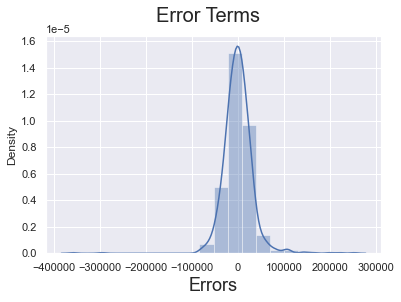

In [61]:
y_train_cnst = lm.predict(X_train_lm)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [62]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.82

In [63]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1166936609014.5986
1142934974.5490682
33807.32131578999


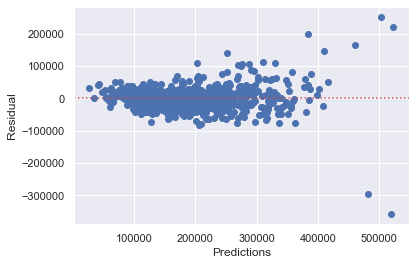

In [64]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data


In [65]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,...,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,0
382,0.427132,-0.120835,0.648310,-0.532073,1.020432,-0.558025,1.051361,0.577925,1.236276,-1.226909,...,0,1,0,0,0,0,0,0,1,0
1170,0.291260,-0.059203,-0.066511,0.384025,-0.387685,-0.558025,-0.699764,-0.533302,1.236276,0.665348,...,0,1,0,0,0,0,0,0,0,0


In [66]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,...,0.002278,0.610478,0.015945,0.052392,0.004556,0.255125,0.054670,0.054670,0.314351,0.398633
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,...,0.047727,0.488198,0.125407,0.223070,0.067420,0.436429,0.227594,0.227594,0.464786,0.490176
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [68]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_ClearCr',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_Veenker', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'GarageFinish_NA',
       'GarageFinish_RFn', 'GarageFinish_Unf'],
      dtype='object')

In [69]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     79.77
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.34e-136
Time:                        20:35:57   Log-Likelihood:                -5209.4
No. Observations:                 439   AIC:                         1.047e+04
Df Residuals:                     415   BIC:                         1.056e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.775e+05   6570.496     27.012      0.000    1.65e+05     1.9e+05
OverallQual           2.915e+04   2956.296      9.862      0.000    2.33e+04     3.5e+04
BsmtExposure          9949.4657   2038.728      4.880      0.000    5941.945     1.4e+04
1stFlrSF              3.292e+04   2628.356     12.524      0.000    2.78e+04    3.81e+04
2ndFlrSF              2.333e+04   2214.429     10.538      0.000     1.9e+04    2.77e+04
MSSubClass_90        -2.615e+04   1.19e+04     -2.200      0.028   -4.95e+04   -2785.955
MSSubClass_120        -1.45e+04   8472.993     -1.711      0.088   -3.12e+04    2155.361
MSSubClass_160       -2.333e+04   1.05e+04     -2.224      0.027    -4.4e+04   -2709.821
MSSubClass_190       -8229.1332   1.63e+04     -0.505      0.614   -4.02e+04    2.38e+04
MSZoning_FV           4.324e+04   1.82e+04      2.382      0.018    7554.374    7.89e+04
MSZoning_RH          -1045.7290   2.15e+04     -0.049      0.961   -4.32e+04    4.11e+04
MSZoning_RL           1.648e+04   5436.116      3.031      0.003    5790.397    2.72e+04
Neighborhood_ClearCr -9484.1393   1.33e+04     -0.713      0.476   -3.56e+04    1.67e+04
Neighborhood_NoRidge  3.508e+04   1.58e+04      2.219      0.027    4011.027    6.61e+04
Neighborhood_NridgHt  6.227e+04   9439.631      6.597      0.000    4.37e+04    8.08e+04
Neighborhood_Somerst -1.582e+04    1.6e+04     -0.987      0.324   -4.73e+04    1.57e+04
Neighborhood_Veenker  1.326e-11   4.56e-12      2.910      0.004     4.3e-12    2.22e-11
Exterior1st_BrkComm  -3.601e-12   2.22e-12     -1.619      0.106   -7.97e-12    7.72e-13
Exterior1st_ImStucc  -2.338e-11    1.4e-11     -1.666      0.097    -5.1e-11    4.21e-12
Exterior2nd_Brk Cmn   1.027e+04   2.73e+04      0.376      0.707   -4.35e+04     6.4e+04
Exterior2nd_BrkFace  -5980.5573   1.21e+04     -0.492      0.623   -2.99e+04    1.79e+04
Exterior2nd_CmentBd   2.315e+04   8232.679      2.812      0.005    6970.592    3.93e+04
Exterior2nd_ImStucc   3.745e+04   2.76e+04      1.358      0.175   -1.68e+04    9.17e+04
Exterior2nd_Stucco    2714.7278   1.48e+04      0.184      0.854   -2.63e+04    3.17e+04
GarageFinish_NA      -2.541e+04   9525.482     -2.668      0.008   -4.41e+04   -6685.587
GarageFinish_RFn     -1.142e+04   4937.630     -2.312      0.021   -2.11e+04   -1710.898
GarageFinish_Unf     -1.305e+04   5395.428     -2.418      0.016   -2.37e+04   -2441.700
==============================================================================
Omnibus:                      150.063   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1177.721
Skew:                           1.243   Prob(JB):                    1.82e-256
Kurtosis:                      10.629   Cond. No.                     1.41e+16
==================

In [70]:
# Making predictions
y_pred = lm.predict(X_test_new)

### calculate r2 score of Test model

In [71]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.79

In [72]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [73]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,MSZoning_FV,4.44
14,Neighborhood_Somerst,4.36
10,MSZoning_RL,3.00
0,OverallQual,2.70
25,GarageFinish_Unf,2.50
2,1stFlrSF,1.98
24,GarageFinish_RFn,1.90
18,Exterior2nd_Brk Cmn,1.82
16,Exterior1st_BrkComm,1.73
3,2ndFlrSF,1.70


Text(0, 0.5, 'y_pred')

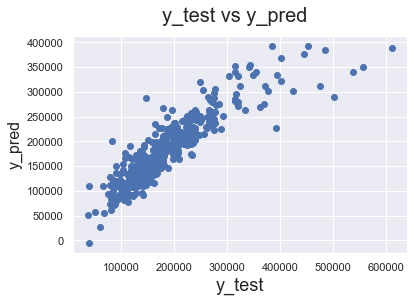

In [74]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [75]:
X_train_new.columns


Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_ClearCr',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_Veenker', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'GarageFinish_NA',
       'GarageFinish_RFn', 'GarageFinish_Unf'],
      dtype='object')

In [76]:
#final dataframe 
final_df = housing[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


### Final evalution


In [77]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8171477831842303
0.7920657550775687
1166936609014.5986
587565023383.9844
1142934974.5490682
1338416909.7585065


### Ridge Regression

In [78]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [80]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 28651.88265593  11184.15978433  25681.10638669  19763.95421257
 -18777.73289083  -9969.54461053 -18641.30978353 -13225.54457304
   9124.96255272   3685.34428996  15350.06180025   9390.37838166
  49409.35087747  46850.14062101  26495.45310177  15488.0414984
  -7321.1743043   -2686.50440754  -1206.55341828  11958.43335772
  11010.45423341  10261.9175459  -14888.99779947 -19594.77119552
 -12305.00341312 -15859.09015951]


In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8140620582374319
0.7953697552192038
1186629262833.4834
578228827120.5706
1162222588.475498
1317149947.8828487


### Lasso

In [82]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [84]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [85]:
lasso.coef_

array([ 27706.20971922,  11265.5481003 ,  25403.11200283,  19637.70338001,
       -18972.96082601,  -9488.40797386, -19625.68200032, -12637.63688709,
            0.        ,      0.        ,  14477.9326604 ,   8536.98609567,
        59302.32446957,  53249.90788075,  36249.19593626,  17634.28679084,
           -0.        ,     -0.        ,     -0.        ,  10847.59534537,
        10016.45965005,   5012.96666902, -14192.75448325, -20450.24911506,
       -12463.61912349, -15821.50791584])

In [86]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8149720512258685
0.7933388324753364
1180821818162.342
583967656575.7029
1156534591.7358885
1330222452.336453


In [87]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.171478e-01,8.140621e-01,8.149721e-01
1,R2 Score (Test),7.920658e-01,7.953698e-01,7.933388e-01
2,RSS (Train),1.166937e+12,1.186629e+12,1.180822e+12
3,RSS (Test),5.875650e+11,5.782288e+11,5.839677e+11
4,MSE (Train),3.380732e+04,3.409139e+04,3.400786e+04
5,MSE (Test),3.658438e+04,3.629256e+04,3.647221e+04


### Que1: Double the values of Alpha for lasso & Ridge

In [88]:
#earlier for Ridge alpha = 7 now take 14
alpha = 14
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 29816.8124883   11224.85626472  25977.94919043  19754.85088783
 -16411.74232114  -8227.30912015 -15165.77167054 -10935.52254689
   9451.83176339   1843.12305907  15004.94683844   7182.09704446
  40881.16132471  39780.40682001  21536.75420194  10702.89180297
  -3922.13298453   -852.95798113  -1584.22362309   9028.11095559
   9080.848509     6973.01499224 -12246.31611877 -16914.99193934
 -10884.77456498 -15034.323047  ]
0.8102080250710739
0.7949156293199601


In [89]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 28561.92545983  11430.19784517  25690.55837914  19474.37701075
 -16478.92218979  -6460.89235736 -15344.56454709  -8612.13684491
      0.              0.          14514.12450983   2989.80880283
  55596.31230252  48805.4860611   32570.89669123   8120.06933679
     -0.             -0.             -0.           4779.47214706
   6564.75439327      0.          -9453.47852564 -17624.26971765
 -10848.63517688 -14648.39388806]
0.811933011042167
0.7932053257176725


In [90]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_ClearCr',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_Veenker', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'GarageFinish_NA',
       'GarageFinish_RFn', 'GarageFinish_Unf'],
      dtype='object')

### Que3: Drop the Top 5 features and rebuild lasso
_Top 5 features are Neighborhood_NoRidge, Neighborhood_NridgHt, 2ndFlrSF, OverallQual, Neighborhood_Veenker_

In [91]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [92]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)


In [93]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [95]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [96]:
lasso.coef_

array([ 12108.37864361,  35239.12332047, -38245.53294912, -16678.9583144 ,
         7473.80544623, -15957.52943671,  17821.57525436,      0.        ,
        10695.92372434,     -0.        ,  30300.15286997, -24693.0939533 ,
            0.        ,     -0.        ,  -1767.24217132,   9601.98837404,
        19821.61909463,      0.        , -74211.49162809, -26110.69411048,
       -59040.18899698])

In [97]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.5594363965806128
0.533284275320939


In [98]:
X_train_new.columns

Index(['BsmtExposure', '1stFlrSF', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'Neighborhood_ClearCr', 'Neighborhood_Somerst',
       'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc',
       'Exterior2nd_Stucco', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object')